# DART 크롤링

In [ ]:
import dart_fss as dart
import pandas as pd
# Open DART API KEY 설정
api_key=''
dart.set_api_key(api_key=api_key)

In [ ]:
# DART 에 공시된 회사 리스트 불러오기
corp_list = dart.get_corp_list()

In [9]:
# 삼성전자 검색.  exactly=True 정확히 일치하는 정보만 나타나게됨
samsung = corp_list.find_by_corp_name('삼성전자', exactly=True)[0]

In [ ]:
# 2012년부터 연간 연결재무제표 불러오기
fs = samsung.extract_fs(bgn_de='20120101')

In [ ]:
# 기업리스트에서 '텔레비전 방송업' 섹터에 속하고 'YKN' 시장에 상장된 기업들을 찾습니다.
corp_list.find_by_sector(sector='텔레비전 방송업',market='YKN')

In [29]:
# 기업리스트에서 '교육' 제품을 제공하는 기업들을 찾습니다.
edu=corp_list.find_by_product(product='교육')

In [31]:
df_temp=pd.DataFrame() # 빈 데이터프레임 생성
# '교육'제품을 제공하는 기업 찾아 데이터프레임에 넣기
for c in edu:
    dict_temp=c.to_dict() # 현재 반복 중인 c를 딕셔너리로 변환
    df_temp2=pd.DataFrame.from_dict(dict_temp, orient='index').T 
    
    #딕셔너리를 데이터프레임으로 변환->from_dict() / 딕셔너리 키를 인덱스로 사용하도록 지정 ->orient=index
    
    df_temp=pd.concat([df_temp, df_temp2]) # df_temp 데이터프레임과 df_temp2 데이터 프레임을 위아래로 이어 붙임

In [ ]:
# 기업리스트에서 '교육지원 서비스업'에 해당되는 업종의 기업찾기.
edu_list=corp_list.find_by_sector('교육지원 서비스업')

In [ ]:
# '교육지원 서비스업'에 해당되는 업종의 기업의 이름, 코드 찾아 리스트에 넣기.
find_list=[]

for e in edu_list:
    find_list.append([e.corp_name, e.corp_code])
    #e -> edu_list의 각 요소 가리킴

In [ ]:
# 'corp_list' 객체에서 '일반 교습 학원' 섹터에 속하는 기업들을 찾습니다.
edu_list = corp_list.find_by_sector('일반 교습 학원')

# 기업 이름과 기업 코드를 담을 리스트 초기화
find_list = []

# 'edu_list'의 각 요소를 순회하며 기업 이름과 기업 코드를 'find_list'에 추가합니다.
for e in edu_list:
    find_list.append([e.corp_name, e.corp_code])
    # e는 'edu_list'의 각 요소를 가리킵니다.

# 빈 데이터프레임 생성
edu_df = pd.DataFrame()

# 'find_list'의 각 요소를 순회합니다.
for e in find_list:
    e_num = e[1] # e 리스트의 두 번째 요소를 e_num에 할당 = corp_code
    
    # 'dart.api.filings.get_corp_info' 함수를 사용하여 e_num에 해당하는 기업의 정보를 가져와 temp에 할당합니다.
    temp = dart.api.filings.get_corp_info(e_num) 
    
    # temp 딕셔너리를 데이터프레임으로 변환하고 행 방향으로 전치합니다.
    edu_temp = pd.DataFrame.from_dict(temp, orient='index').T 
    
    # edu_df와 edu_temp를 결합합니다. - 기업개황에 대한 데이터프레임 생성됨
    edu_df = pd.concat([edu_df, edu_temp])


In [73]:
# 기업개황 열이름을 가져오기
col_name=pd.read_csv('./기업개황 열이름.csv', encoding='cp949')

In [74]:
new_columns=[] # 빈 리스트 생성

for c in edu_df.columns:
    try:
        m=col_name['응답키']==c # col_name 데이터프레임에서 응답키 열 값이 현재 열 c와 일치하는지 확인하는 조건 만듦
        new_c=col_name[m]['명칭'].iloc[0] # 조건 만족하면 해당 조건에 해당하는 명칭 열의 첫 값 가져와 new_c에 저장
        # [m]은 특정 조건 만족하는 행 선택 위한 불리언 마스크. 데이터 프레임에서 특정 조건 충족 행 선택 위해 사용. 
        # m은 col_name['응답키']==c라는 조건을 담고 있음.
        
        new_columns.append(new_c) # 새로운 열 이름을 new_columns 리스트에 추가
    except:
        new_columns.append(c) #c의 데이터 바로 저장 # 예외 발생 시 현재 열 이름 그대로 유지하고 new_columns 리스트에 추가

In [75]:
# 'edu_df'의 열 이름을 'new_columns' 리스트의 값들로 변경합니다.
edu_df.columns=new_columns

In [79]:
import re
# findall 사용해서 주소에서 '구'만 추출
re.findall('[가-힣]+구','서울특별시 서초구')

['서초구']

In [86]:
# 지역(구) 정보 추출
edu_df['지역(구)']=edu_df['주소'].apply(lambda x: re.findall('[가-힣]+구', x)[0])

In [87]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sns.set(font_scale=1.4)
# 맑은 고딕으로 글꼴 설정하기
plt.rc('font', family='Malgun Gothic') 
# 마이너스 기호 문제 해결하기
mpl.rcParams['axes.unicode_minus'] = False

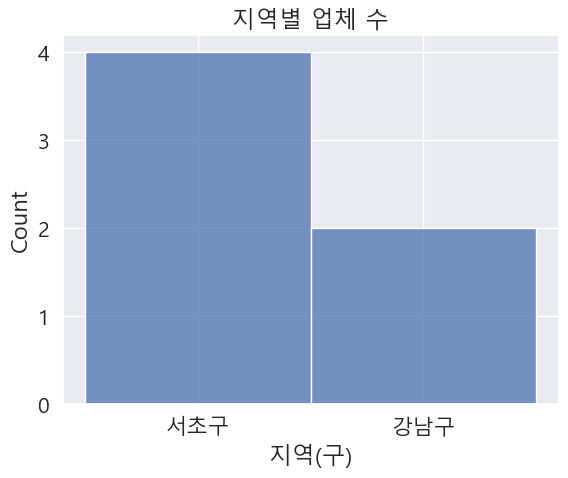

In [88]:
# 지역별 업체 수 시각화
sns.histplot(data=edu_df, x='지역(구)')
plt.title('지역별 업체 수')
plt.show()

# 업종분류별 시각화

In [110]:
code=pd.read_csv('./업종코드.csv', encoding='cp949', index_col=0)
# index_col=0 : 첫번째 열을 행 인덱스로 사용

In [113]:
# 빈 리스트 생성
new_code = []

# 'edu_df'의 '업종코드' 열의 각 값에 대해 반복합니다.
for e in edu_df['업종코드']:
    try:
        # 'code' 데이터프레임에서 '업종명' 열의 값을 가져와 'new_code' 리스트에 추가합니다.
        new_code.append(code.loc[int(e), '업종명'])
    except:
        # 예외가 발생하면 '기타'와 해당 코드 값을 합친 문자열을 'new_code' 리스트에 추가합니다.
        new_code.append(f'기타({e})')

# 'edu_df'에 '업종' 열을 추가하고, 'new_code' 리스트의 값들로 채웁니다.
edu_df['업종'] = new_code


# 구글 스칼라 크롤링
- 중간에 막혀서 끝까지 수행하지 못함.
- 코드만 작성.

In [249]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [ ]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# 검색 키워드 및 초기 설정
keyword = '교육'
page = 0
ylo = 2023
yhi = 2023
scholar_data = pd.DataFrame(columns=['제목', '저자', '출간연도', '요약', 'URL'])

while True:
    # 잠시 대기
    time.sleep(0.5)

    # 구글 스칼라 URL 설정
    scholar = f''
    
    # HTML 데이터 가져오기
    req = requests.get(scholar)
    html = req.content
    soup = BeautifulSoup(html, 'html.parser')

    # 페이지 종료 확인
    if soup.select('h3.gs_rt') == []:
        break

    # 데이터 파싱
    title = [t.text for t in soup.select('h3.gs_rt')]
    url = [l.find('a')['href'] for l in soup.select('h3.gs_rt')]

    author = []
    year = []

    # 저자 및 출간연도 파싱
    for i in soup.select('div.gs_a'):
        temp = re.sub('\s+', ' ', i.text)
        author.append(re.sub(', ',',', temp).split('-')[0])
        year.append(re.sub(', ',',', temp).split('-')[1])
        
        # author_year = re.sub('，', ', ', temp).split(' - ')
        # author.append(author_year[0])
        # year.append(author_year[1] if len(author_year) > 1 else '')

    # 요약 파싱
    abst = [re.sub('\s+', ' ', p.text) for p in soup.select('div.gs_rs')]

    # 데이터프레임으로 변환
    res=pd.DataFrame([title, author, year, abst, url], index=['제목', '저자', '출간연도', '요약', 'url'])
    
    # 기존 데이터프레임과 결합
    scholar_data = pd.concat([scholar_data, res], ignore_index=True)
    
    # 페이지 번호 업데이트
    page += 10

# 데이터 저장
scholar_data.to_csv('scholar_data.csv', index=False, encoding='cp949')
